# Model Selection and Validation

We will be using up different models and would try to find the best model among them using cross validation error and trying to improve the model

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Regression

we are given the dataset below consisting of 50 examples of an input feature `x` and its corresponding target `y`.

In [6]:
data = np.loadtxt("C:/Users/win10/datasets/data_w3_ex1_19.csv",delimiter=',')

In [7]:
data

array([[1651.  ,  432.65],
       [1691.82,  454.94],
       [1732.63,  471.53],
       [1773.45,  482.51],
       [1814.27,  468.36],
       [1855.08,  482.15],
       [1895.9 ,  540.02],
       [1936.71,  534.58],
       [1977.53,  558.35],
       [2018.35,  566.42],
       [2059.16,  581.4 ],
       [2099.98,  596.46],
       [2140.8 ,  596.71],
       [2181.61,  619.45],
       [2222.43,  616.58],
       [2263.24,  653.16],
       [2304.06,  666.52],
       [2344.88,  670.59],
       [2385.69,  669.02],
       [2426.51,  678.91],
       [2467.33,  707.44],
       [2508.14,  710.76],
       [2548.96,  745.19],
       [2589.78,  729.85],
       [2630.59,  743.8 ],
       [2671.41,  738.2 ],
       [2712.22,  772.95],
       [2753.04,  772.22],
       [2793.86,  784.21],
       [2834.67,  776.43],
       [2875.49,  804.78],
       [2916.31,  833.27],
       [2957.12,  825.69],
       [2997.94,  821.05],
       [3038.76,  833.82],
       [3079.57,  833.06],
       [3120.39,  825.7 ],
 

In [9]:
#data Spliting
x = data[:,0]
y = data[:,1]
print(x)
print(y)

[1651.   1691.82 1732.63 1773.45 1814.27 1855.08 1895.9  1936.71 1977.53
 2018.35 2059.16 2099.98 2140.8  2181.61 2222.43 2263.24 2304.06 2344.88
 2385.69 2426.51 2467.33 2508.14 2548.96 2589.78 2630.59 2671.41 2712.22
 2753.04 2793.86 2834.67 2875.49 2916.31 2957.12 2997.94 3038.76 3079.57
 3120.39 3161.2  3202.02 3242.84 3283.65 3324.47 3365.29 3406.1  3446.92
 3487.73 3528.55 3569.37 3610.18 3651.  ]
[432.65 454.94 471.53 482.51 468.36 482.15 540.02 534.58 558.35 566.42
 581.4  596.46 596.71 619.45 616.58 653.16 666.52 670.59 669.02 678.91
 707.44 710.76 745.19 729.85 743.8  738.2  772.95 772.22 784.21 776.43
 804.78 833.27 825.69 821.05 833.82 833.06 825.7  843.58 869.4  851.5
 863.18 853.01 877.16 863.74 874.67 877.74 874.11 882.8  910.83 897.42]


In [10]:
print(x.shape)
print(y.shape)

(50,)
(50,)


presently x and y are in single dimension arrays we would require it in the form of 2 dimensional data further 

In [11]:
x = np.expand_dims(x,axis=1)
y = np.expand_dims(y,axis=1)

In [12]:
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


# Split the data into train , cross validation and test data

* ***training set*** - used to train the model
* ***cross validation set (also called validation, development, or dev set)*** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.
* ***test set*** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

In [14]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train,x_,y_train,y_ = train_test_split(x,y, test_size=0.4,random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

In [16]:
print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)
print("\n")
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(30, 1)
(10, 1)
(10, 1)


(30, 1)
(10, 1)
(10, 1)


# Feature Scaling 

using z-score normalization 

In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [27]:
print(f"Computed mean of the training set: {scaler.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler.scale_.squeeze():.2f}")

print(f"Computed mean of the training set after normalization: {np.mean(x_train_scaled):.2f}")
print(f"Computed standard deviation of the training set after normalization: {np.std(x_train_scaled):.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85
Computed mean of the training set after normalization: -0.00
Computed standard deviation of the training set after normalization: 1.00


In [22]:
x_train_scaled

array([[ 1.43],
       [-0.28],
       [ 1.71],
       [ 0.22],
       [ 0.15],
       [-1.2 ],
       [ 0.86],
       [-0.49],
       [ 0.65],
       [-0.77],
       [ 0.5 ],
       [ 1.64],
       [ 0.93],
       [-0.21],
       [-0.06],
       [ 0.29],
       [-1.06],
       [-0.99],
       [ 1.85],
       [-1.41],
       [-0.35],
       [-1.48],
       [-0.42],
       [-1.13],
       [-0.7 ],
       [-0.84],
       [-0.92],
       [-0.63],
       [ 1.57],
       [ 1.14]])

We have normalized our training set it will create an ease in finding the weights more optimally using the optimisation algorithms

# Training the model

In [28]:
linear_model1 = LinearRegression()
linear_model1.fit(x_train_scaled,y_train)

LinearRegression()

# Model Evaluation

To evaluate the performance of your model, you will measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m`, where `m` is the number of examples. As mentioned in Course 1 of this Specialization (cost function lectures), dividing by `2m` is a convention we will follow but the calculations should still work whether or not you include it. Thus, to match the equation above, you can use the scikit-learn function then divide by 2 as shown below. We also included a for-loop implementation so you can check that it's equal. 

Another thing to take note: Since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [36]:
y_predict = linear_model1.predict(x_train_scaled)
y_predict
m = len(y_predict)
# loop method implementation
mse=0
for i in range(m):
    mse = mse + (y_predict[i]-y_train[i])**2
    
mse = mse/(2*len(y_predict))
print(f"mean square error by loop method is {mse}")

from sklearn.metrics import mean_squared_error
print(f"mean square error by sklearn method is {mean_squared_error(y_predict,y_train)/2}")

mean square error by loop method is [406.19]
mean square error by sklearn method is 406.19374192533127


checking up on cross validation set

In [37]:
x_cv_scaled = scaler.fit_transform(x_cv)
y_cv_pred = linear_model1.predict(x_cv_scaled)
print(f"mean square error by sklearn method on dev set is {mean_squared_error(y_cv_pred,y_cv)/2}")

mean square error by sklearn method on dev set is 3696.781174313862


# Adding Polynomial features

### Create the additional features

First, you will generate the polynomial features from your training set. The code below demonstrates how to do this using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class. It will create a new input feature which has the squared values of the input `x` (i.e. degree=2).

In [38]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


By adding polynomial features we now have 2 features x and x^2

In [39]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


You can then proceed to train the model. After that, you will measure the model's performance against the cross validation set. Like before, you should make sure to perform the same transformations as you did in the training set. You will add the same number of polynomial features then scale the range of values.

In [40]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 87.69841211111911


You'll notice that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial. You may want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models 

You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

In [41]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    


### Choosing the best model

When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest `cv_mse` as the one best suited for your application.

In [42]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets.

In [43]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


# Neural Networks

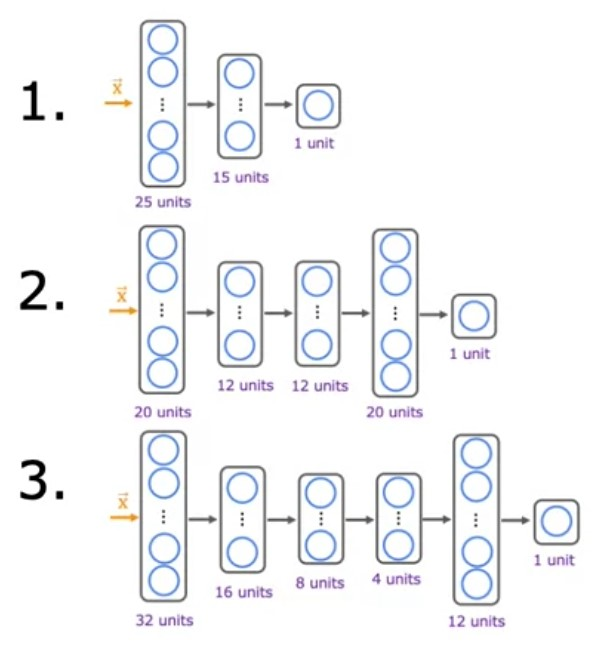

we will try to implement these 3 neural network models and find which model is better

we will use same train , dev and test datasets

In [44]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [45]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [53]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models()

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_1...
Done!

1/1 [==============================] - 0s 16ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 18ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 16ms/step
RESULTS:
Model 1: Training MSE: 89.02, CV MSE: 133.12
Model 2: Training MSE: 406.19, CV MSE: 551.78
Model 3: Training MSE: 73.38, CV MSE: 112.65


In [54]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 6ms/step
Selected Model: 3
Training MSE: 73.38
Cross Validation MSE: 112.65
Test MSE: 135.31


# Classification

### Load the Dataset

First, you will load a dataset for a binary classification task. It has 200 examples of two input features (`x1` and `x2`), and a target `y` of either `0` or `1`.

In [57]:
# Load the dataset from a text file
data = np.loadtxt("C:/Users/win10/datasets/Files (1)/Files/home/jovyan/work/data/data_w3_ex2.csv", delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


In [58]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [59]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

### Evaluating the error for classification models

In the previous sections on regression models, you used the mean squared error to measure how well your model is doing. For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified. For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of `40%` or `0.4`. The code below demonstrates this using a for-loop and also with Numpy's [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function. 

In [60]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


### Build and train the model

You will use the same neural network architectures in the previous section so you can call the `build_models()` function again to create new instances of these models. 

You will follow the recommended approach mentioned last week where you use a `linear` activation for the output layer (instead of `sigmoid`) then set `from_logits=True` when declaring the loss function of the model. You will use the [binary crossentropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) because this is a binary classification problem.

After training, you will use a [sigmoid function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) to convert the model outputs into probabilities. From there, you can set a threshold and get the fraction of misclassified examples from the training and cross validation sets.

You can see all these in the code cell below.

In [62]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = build_models()

# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

2/2 [==============================] - 0s 0s/step
Training model_2...
Done!

2/2 [==============================] - 0s 4ms/step
Training model_3...
Done!

2/2 [==============================] - 0s 0s/step
Model 1: Training Set Classification Error: 0.05833, CV Set Classification Error: 0.12500
Model 2: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.15000
Model 3: Training Set Classification Error: 0.08333, CV Set Classification Error: 0.10000


From the output above, you can choose which one performed best. If there is a tie on the cross validation set error, then you can pick the one with the lower training set error. Finally, you can compute the test error to report the model's generalization error.

In [63]:
# Select the model with the lowest error
model_num = 3

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 0s/step
Selected Model: 3
Training Set Classification Error: 0.0833
CV Set Classification Error: 0.1000
Test Set Classification Error: 0.2000
